# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



#1

In [3]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  """
  Calculates a probability of a driver being drunk 
  for a 100% true positive breathalyzer test.

  Arguments:

  prob_drunk_prior - probability of a driver being drunk (float)
  false_positive_rate - probability of driver not being drunk, 
  given positive breathalyzer test (float)

  Returns:

  probability of a driver being drunk (float)
  """
  prob_positive_given_drunk = 1
  prob_positive = prob_positive_given_drunk*prob_drunk_prior + false_positive_rate*(1-prob_drunk_prior)

  return prob_positive_given_drunk*prob_drunk_prior/prob_positive

In [6]:
prior = 0.001
false_positive = 0.08

print('Probability that a driver is drunk after one breathalyzer test is', int(prob_drunk_given_positive(prior, false_positive)*100), 'percent')

Probability that a driver is drunk after one breathalyzer test is 1 percent


In [10]:
prior = 0.001
false_positive = 0.08

for i in range(1, 100):
  prior = prob_drunk_given_positive(prior, false_positive)
  if prior >= .95:
    print(i, 'positive breathalyzer tests are needed', 
          'in order to be', int(prior*100), '% confident that a person is not drunk')
    break

4 positive breathalyzer tests are needed in order to be 96 % confident that a person is not drunk


#2

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [40]:
random_df = np.random.normal(5, 10, 100)
random_df

array([ -3.5167047 , -10.64390378,  -2.49197359,  -2.82033336,
        -1.15378348,   1.18700262,  -1.89522364,  15.57759912,
        -2.25849337,   7.27760582,   9.35372307,  -5.19479698,
        27.26380846,  22.9024279 , -13.08654949,  31.95300153,
        17.86276711,  11.04212571,   2.35792162,   3.27555702,
         3.69884179,   7.24414092,   0.79668529,  -2.82938066,
         3.88802059,  13.08858851,  26.08867444,   7.64751984,
        -1.64215186,  -9.05099987,  18.76966386,   9.82538336,
         2.80913601,  12.05906266,  12.28535124,  -6.95933533,
         6.40543415,   2.10897733,   4.22974034,  18.15836134,
        16.75953078,   5.26177278,   6.03812292,  -3.49530948,
       -15.42872375,   7.86498778,   6.09369327,   9.89008232,
         7.53103899,  28.56087438,  21.24274038,  -2.61485368,
        16.41395603,   5.1159111 ,   0.24567781,   8.60466271,
        12.07401497,   4.66093419,  -3.99145595,  31.40859678,
        -0.76394484,  -8.41644272,  -3.43978798,  -7.82

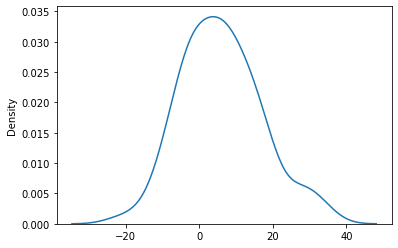

In [41]:
sns.kdeplot(random_df);

In [42]:
freq = stats.t.interval(.95, random_df.shape[0], 
                 loc=random_df.mean(),
                 scale=stats.sem(random_df))
freq

(3.816998523970386, 8.159562451525023)

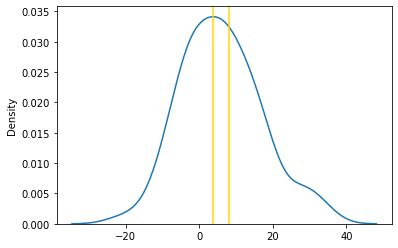

In [43]:
sns.kdeplot(random_df)
plt.axvline(freq[0], color='gold')
plt.axvline(freq[1], color='gold');

In [44]:
bayes = stats.bayes_mvs(random_df, alpha=.95)[0][1]
bayes

(3.816729919119221, 8.159831056376188)

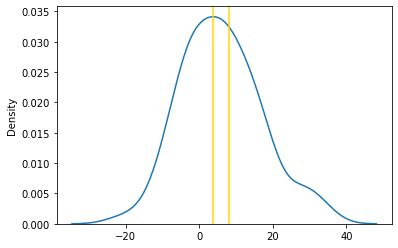

In [45]:
sns.kdeplot(random_df)
plt.axvline(bayes[0], color='gold')
plt.axvline(bayes[1], color='gold');

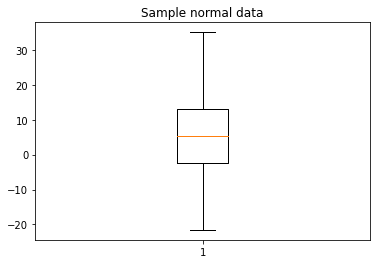

In [57]:
fig1, ax1 = plt.subplots()
ax1.set_title('Sample normal data')
ax1.boxplot(random_df);

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!